In [1]:
import cv2,os
data_path='/content/drive/MyDrive/Digital Knee X-ray Images/Knee X-ray Images/MedicalExpert-I'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'3Moderate': 0, '1Doubtful': 1, '0Normal': 2, '2Mild': 3, '4Severe': 4}
['3Moderate', '1Doubtful', '0Normal', '2Mild', '4Severe']
[0, 1, 2, 3, 4]


In [2]:
img_size=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image
print(label)
print(data)

Streaming output truncated to the last 5000 lines.
       [ 40,  46,  53, ...,   5,   5,   4],
       [ 41,  47,  54, ...,   5,   5,   4]], dtype=uint8), array([[  0,   0,   1, ..., 121, 119, 117],
       [  0,   0,   1, ..., 121, 118, 117],
       [  0,   0,   0, ..., 120, 118, 117],
       ...,
       [  0,   0,   0, ...,   8,   8,   7],
       [  0,   0,   0, ...,   8,   8,   7],
       [  0,   0,   0, ...,   8,   8,   7]], dtype=uint8), array([[ 9, 10, 10, ..., 36, 19, 13],
       [ 9, 10, 10, ..., 36, 19, 13],
       [ 9, 10,  9, ..., 37, 20, 13],
       ...,
       [17, 18, 18, ..., 16, 16, 16],
       [17, 18, 18, ..., 16, 16, 16],
       [18, 18, 17, ..., 16, 16, 16]], dtype=uint8), array([[ 8,  9, 26, ..., 76, 74, 73],
       [ 8,  9, 27, ..., 76, 75, 73],
       [ 8, 10, 28, ..., 76, 75, 73],
       ...,
       [ 4,  5,  5, ...,  1,  1,  1],
       [ 4,  5,  5, ...,  1,  1,  1],
       [ 4,  5,  5, ...,  1,  1,  1]], dtype=uint8), array([[  0,   0,   0, ..., 109, 106, 104],
 

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
new_label= tf.keras.utils.to_categorical(label)

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.layers import LeakyReLU
from tensorflow.keras.layers import LeakyReLU

model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=data.shape[1:]))    #input is to output 128 filters to the output matrix 3*3
model.add(LeakyReLU(alpha=0.1))         # increasing the linearity ie to put color in non negitive integer value to pixel
model.add(MaxPooling2D(pool_size=(2,2)))     # Max pooling layer will go through the matrix by computing the max of each 2×2 pool with a jump of 2
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(64,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer

model.add(Dropout(0.2))
model.add(Dense(128, activation=LeakyReLU(alpha=0.1)))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64, activation=LeakyReLU(alpha=0.1)))
#Dense layer of 64 neurons

model.add(Dense(5,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.1)

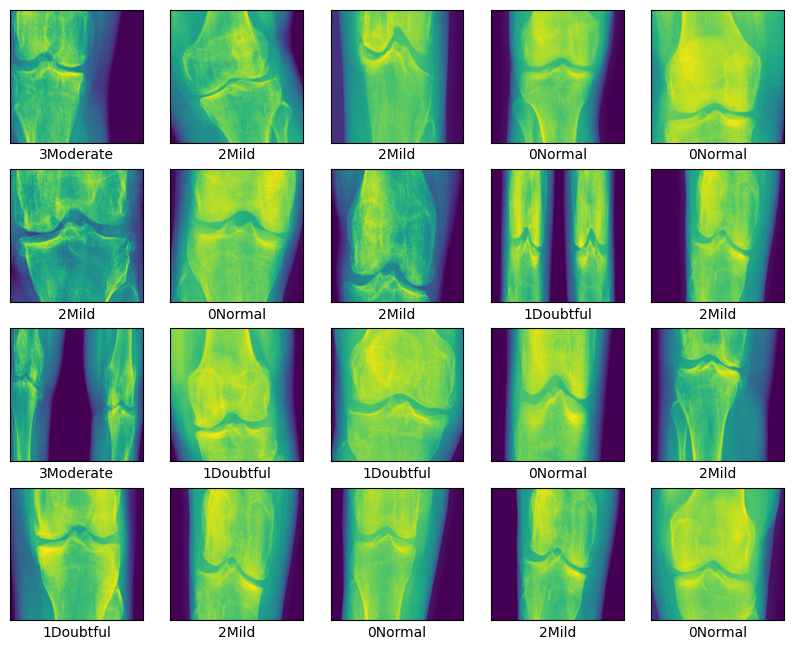

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(np.squeeze(x_test[i]))
    plt.xlabel(categories[np.argmax(y_test[i])])
plt.show()

In [8]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
38/38 [==============================] - 23s 210ms/step - loss: 1.5858 - accuracy: 0.3131 - val_loss: 1.7105 - val_accuracy: 0.2862
Epoch 2/50
38/38 [==============================] - 6s 163ms/step - loss: 1.5229 - accuracy: 0.3274 - val_loss: 1.5631 - val_accuracy: 0.2761
Epoch 3/50
38/38 [==============================] - 6s 162ms/step - loss: 1.4881 - accuracy: 0.3443 - val_loss: 1.5086 - val_accuracy: 0.2828
Epoch 4/50
38/38 [==============================] - 6s 167ms/step - loss: 1.4512 - accuracy: 0.3611 - val_loss: 1.4994 - val_accuracy: 0.3098
Epoch 5/50
38/38 [==============================] - 6s 163ms/step - loss: 1.3983 - accuracy: 0.3864 - val_loss: 1.4856 - val_accuracy: 0.3300
Epoch 6/50
38/38 [==============================] - 6s 167ms/step - loss: 1.3646 - accuracy: 0.3779 - val_loss: 1.4774 - val_accuracy: 0.3535
Epoch 7/50
38/38 [==============================] - 6s 166ms/step - loss: 1.3304 - accuracy: 0.4411 - val_loss: 1.4258 - val_accuracy: 0.3737
Epoch

In [9]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


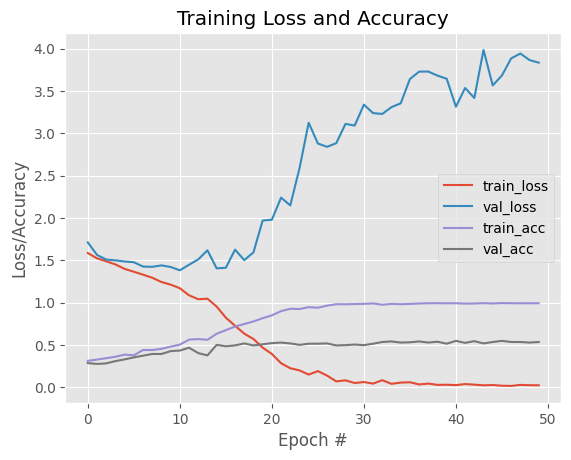

In [10]:
  from matplotlib import pyplot as plt
# plot the training loss and accuracy
N = 50 #number of epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")

In [11]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 3.0793468952178955 %
test accuracy: 0.521212100982666 %


In [12]:
vaL_loss, val_accuracy= model.evaluate(x_test, y_test, verbose=0)
print("test loss:", vaL_loss,'%')
print("test accuracy:", val_accuracy,"%")

test loss: 3.0793468952178955 %
test accuracy: 0.521212100982666 %


6/6 [==============================] - 0s 55ms/step


<Figure size 640x480 with 0 Axes>

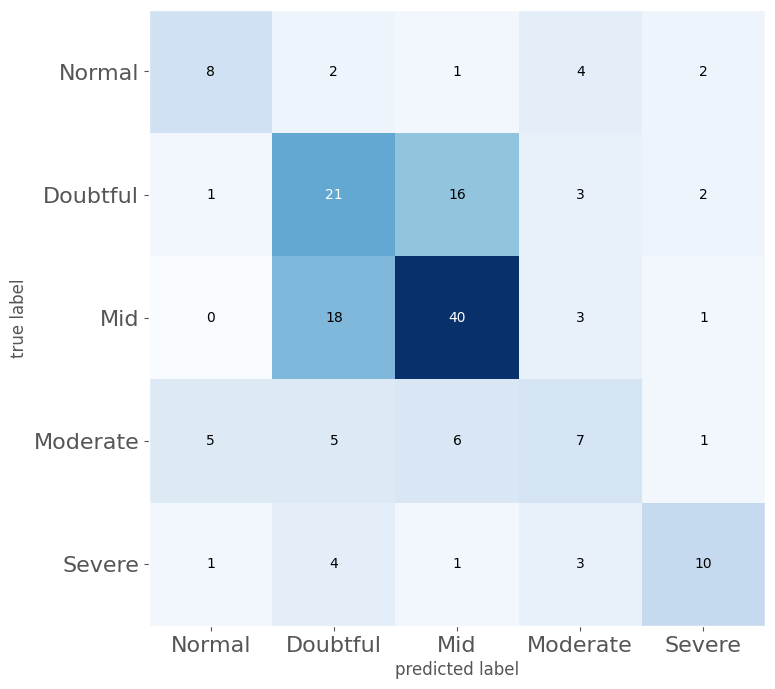

In [13]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

test_labels = np.argmax(y_test, axis=1)
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=-1)

cm  = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(12,8), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.yticks(range(5), ['Normal','Doubtful','Mid','Moderate','Severe'], fontsize=16)
plt.show()